In [87]:
import yfinance as yf
import numpy as np
import arch

In [88]:
ticker = "^GSPC"
data = yf.download(ticker, start="2000-01-01", end="2023-01-01")

/tmp/ipython-input-3835189503.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2000-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


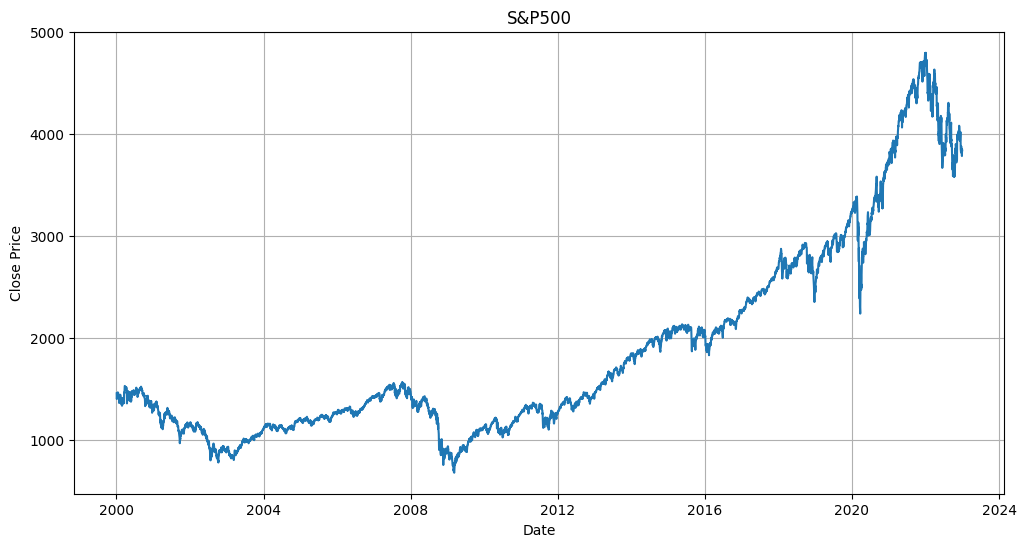

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## Feature Engineering

In [90]:
# Create variable Log Returns and further
data["LogReturn"] = np.log(data["Close"]).diff()
data = data.iloc[1:]

In [91]:
data.head()

Price,Close,High,Low,Open,Volume,LogReturn
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,-0.039099
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,0.001920
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,0.000955
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,0.026730
2000-01-10,1457.599976,1464.359985,1441.469971,1441.469971,1064800000,0.011128


## GARCH(1,1) Model for Volatility Forecast



In [92]:
model = arch.arch_model(data["LogReturn"]*1000, vol="GARCH", p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 53962850579.515564
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2645515.685343718
Iteration:      3,   Func. Count:     20,   Neg. LLF: 25868.8859358919
Iteration:      4,   Func. Count:     27,   Neg. LLF: 21482.103291841762
Iteration:      5,   Func. Count:     33,   Neg. LLF: 21384.53187807616
Iteration:      6,   Func. Count:     39,   Neg. LLF: 21598.2746027969
Iteration:      7,   Func. Count:     45,   Neg. LLF: 21375.29916287455
Iteration:      8,   Func. Count:     50,   Neg. LLF: 21375.2810517462
Iteration:      9,   Func. Count:     56,   Neg. LLF: 21375.233548873897
Iteration:     10,   Func. Count:     61,   Neg. LLF: 21375.231371503283
Iteration:     11,   Func. Count:     66,   Neg. LLF: 21375.231370664595
Optimization terminated successfully    (Exit mode 0)
            Current function value: 21375.231370664595
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations:

In [93]:
data['GARCH_volatility'] = model_fit.conditional_volatility
data.head()

Price,Close,High,Low,Open,Volume,LogReturn,GARCH_volatility
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,-0.039099,16.226390
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,0.001920,20.597183
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,0.000955,19.173399
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,0.026730,17.851791
2000-01-10,1457.599976,1464.359985,1441.469971,1441.469971,1064800000,0.011128,19.008591


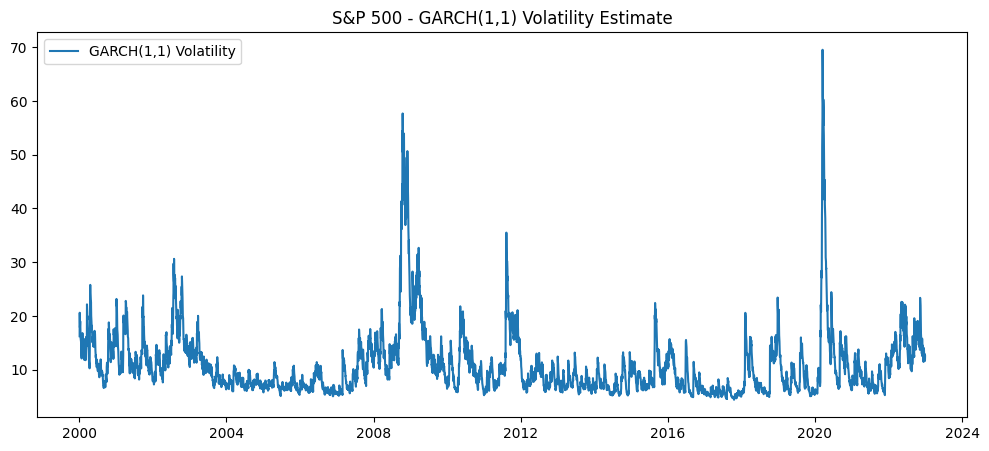

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(data['GARCH_volatility'], label='GARCH(1,1) Volatility')
plt.title('S&P 500 - GARCH(1,1) Volatility Estimate')
plt.legend()
plt.show()